# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [3]:
# uncomment and run the following lines for mounting Google Drive to the notebook (to be used only if executing in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Great Learning/Module 3/Project/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

* The dataset contains information about different types of used phones and tablets.


### Checking the shape of the dataset

In [5]:
data.shape

(3454, 15)

* The dataset contains information (15 attributes) about 3454 used phones and tablets.

In [6]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized used price, which is of *float* type

### Statistical summary of the dataset

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* The normalized used price ranges from 1.54 euros to 6.62 euros.
* The average normalized used price is 4.36 euros.
* There are more 4g devices (1119) than 5g devices (152) in the dataset.
* *Android* is the most occurring type of OS.
* The release date ranges from 2013 (oldest models) to 2020 (newest models)
* The mean and median values for variables - Normalized used price, Normalized new price and Ram are approximately the same. It strongly suggests that the distribution of the data for these variables is symmetrical.

### Checking for duplicate values

In [9]:
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data

### Checking for missing values

In [10]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* There are missing values in six columns.

In [11]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Problem Definition**

Our goal is to develop a pricing model for used electronic devices by accurately predicting their used price. This is achieved by building a linear regression model that identifies the important device features that significantly influence resale price. The insights obtained will provide a data-driven action plan for ReCell's pricing, inventory acquisition, and marketing strategies.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

**The below functions need to be defined to carry out the EDA.**

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Observations on normalized_used_price`**

**What does the distribution of normalized used device prices look like?**

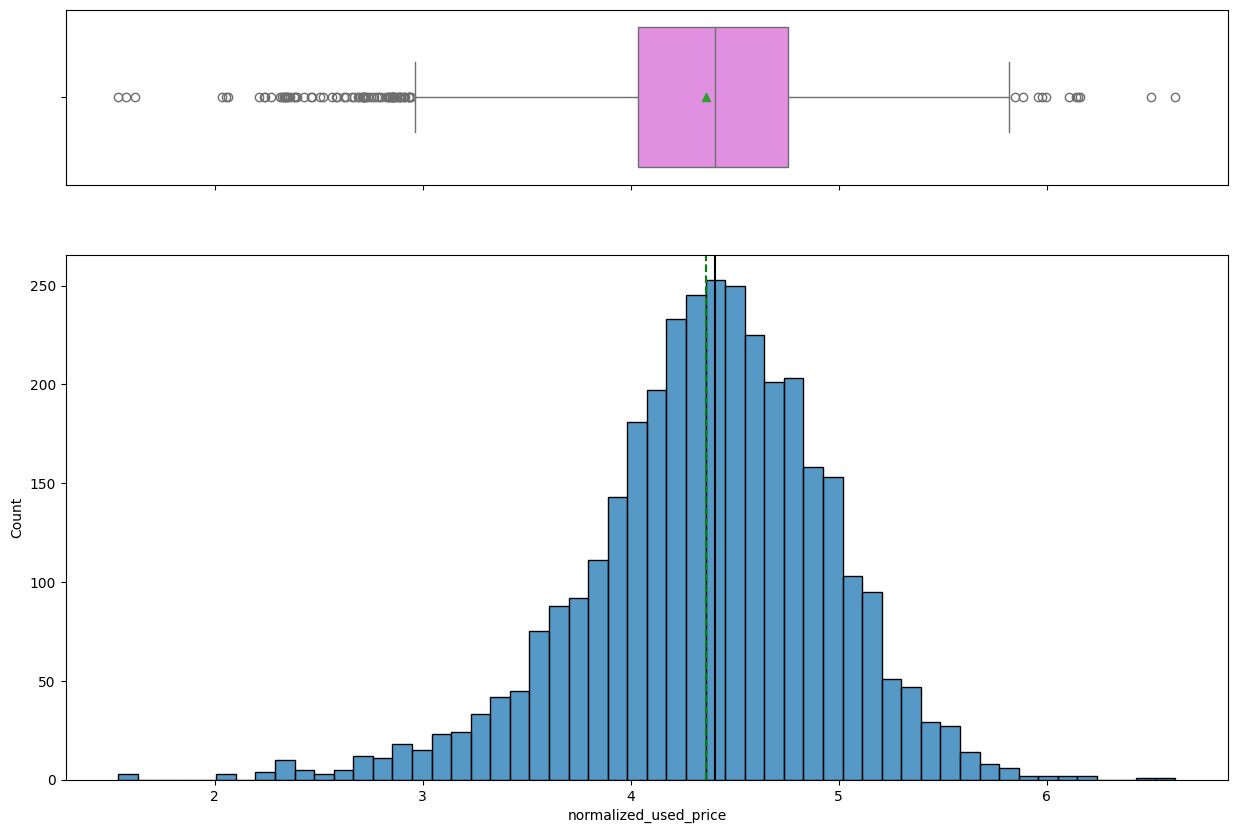

In [14]:
histogram_boxplot(df, "normalized_used_price")

* The normalized used prices are close to normally distributed with thin tails.
* On average the normalized used price is approximately 4.5 euros.
* Outliers on both sides of the boxplot shows high variability, with a wide price range between the lowest and highest values.
* The presence of outliers on both ends, and mean and median values close together suggests the data is likely symmetrical.

In [15]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**`Observations on normalized_new_price`**

**What does the distribution of normalized new device prices look like?**

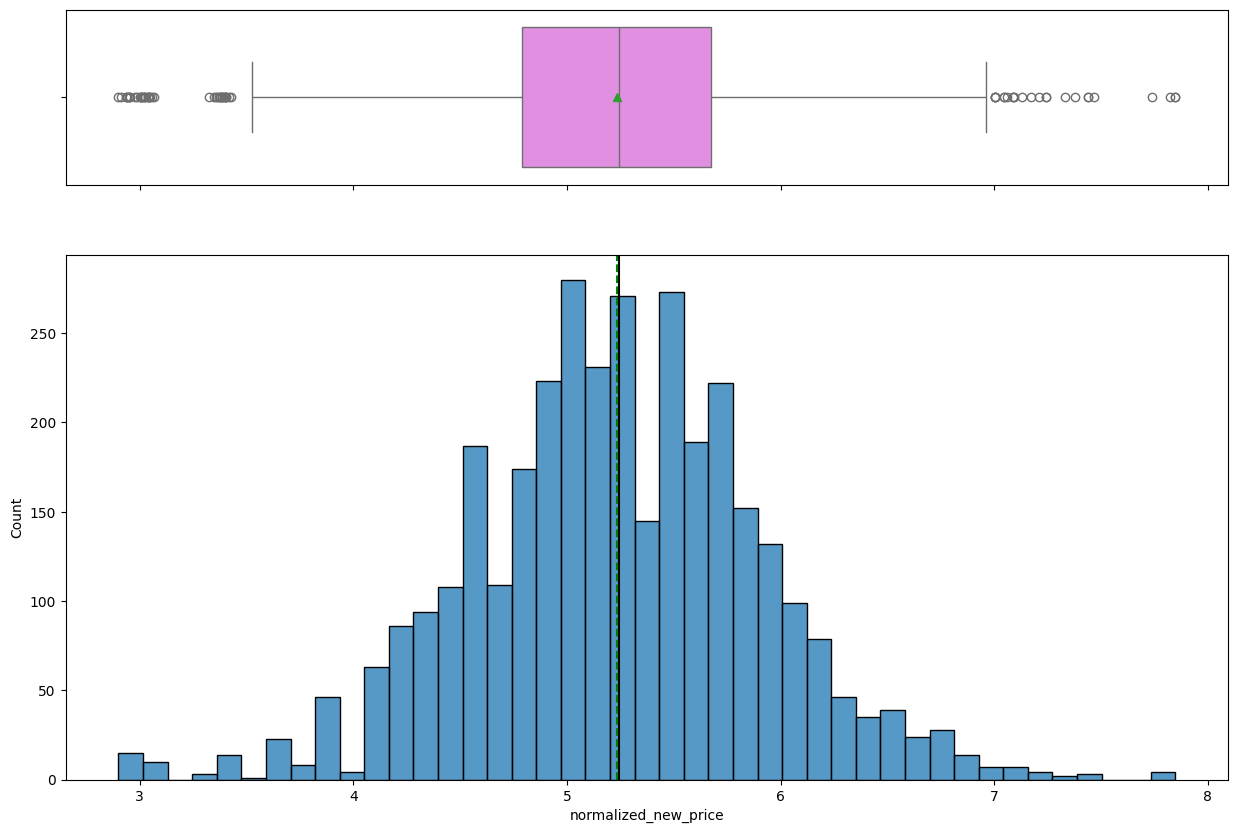

In [16]:
histogram_boxplot(df, "normalized_new_price")

* The normalized new prices are close to normally distributed.
* On average the normalized new price is approximately 5.2 euros
* Outliers on both sides of the boxplot shows high variability, with a wide price range between the lowest and highest values.
* The presence of outliers on both ends, and mean and median values close together suggests the data is likely symmetrical.

**`Observations on screen_size`**

**What does the distribution of screen size look like? Are there distinct tiers or groups?**

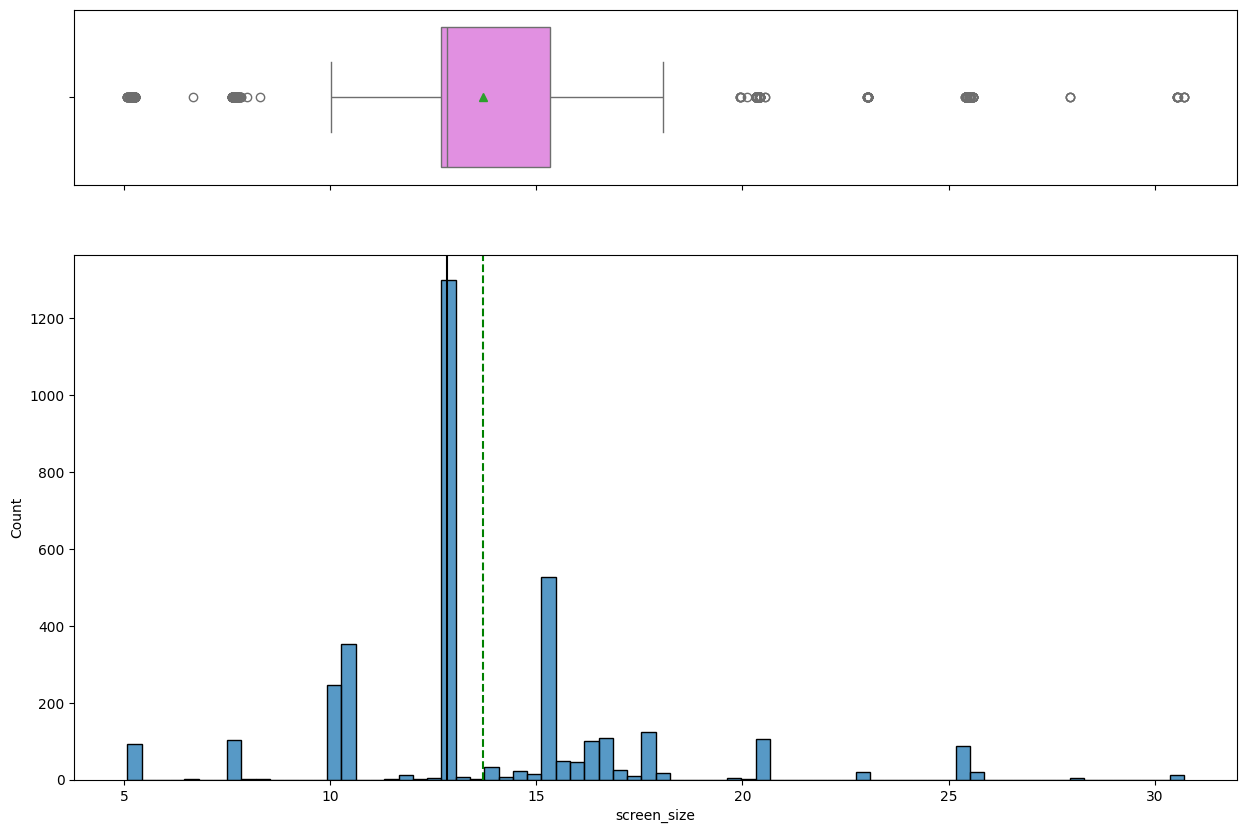

In [17]:
histogram_boxplot(df, "screen_size")

* The data is right skewed and consists of several distinct groups corresponding to standard screen sizes.
* These groups almost certainly correspond to the most popular, standard screen sizes for used devices (e.g. 10-11 inches, 12-13 inches, 15-16 inches)
* There is a large cluster around the 12-13 inch mark.
* The distribution for screen size column is right-skewed with a median screen size of about 12 inches.
* The boxplot's the Interquartile Range tells us that the central 50% of all devices are highly concentrated in around a small range of sizes (between approximately 13 and 16 inches)
* The outliers shown in the boxplot are most likely not errors, they are smaller less common screen size groups.

**`Observations on main_camera_mp`**

**What does the distribution of main_camera_mp look like? Are there distinct tiers or groups?**

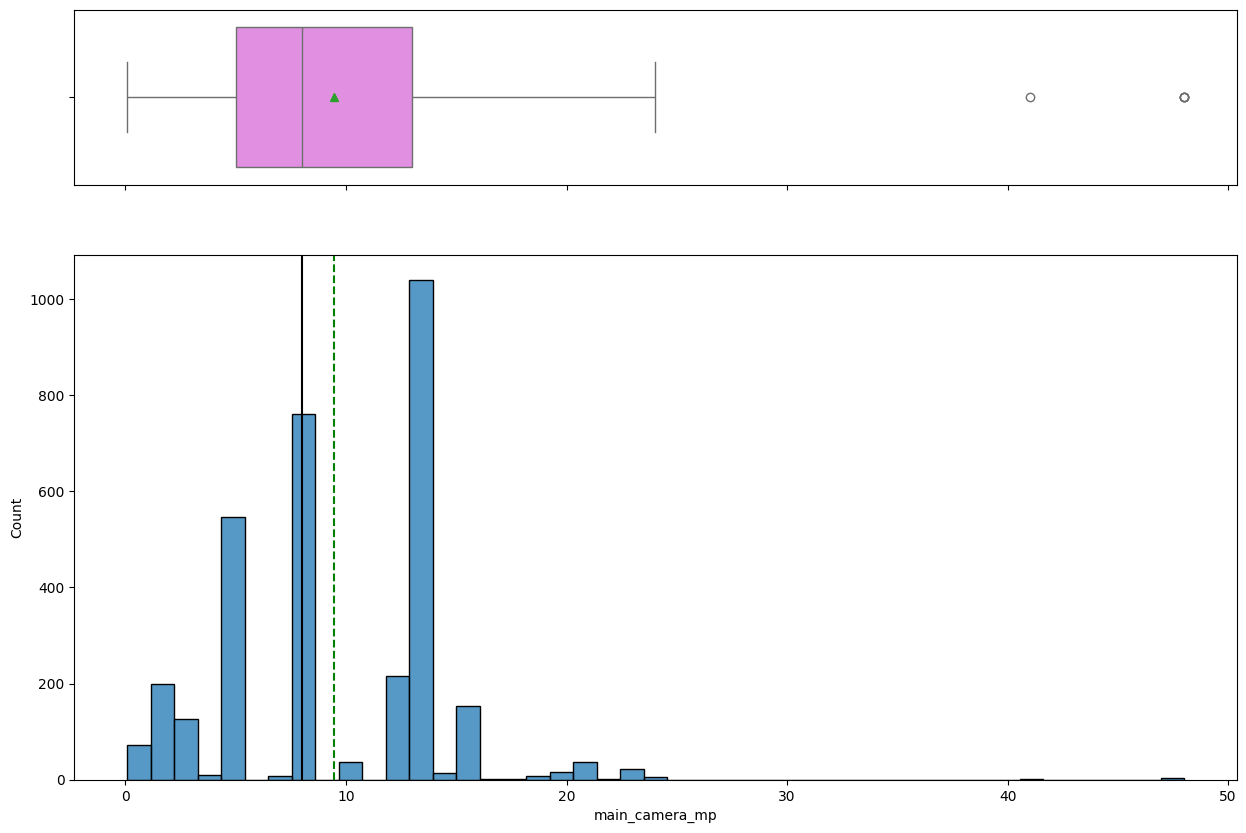

In [18]:
histogram_boxplot(df, "main_camera_mp")

* The distribution for main camera column is right-skewed and bimodal. The first peak is around 8 MP, which aligns with the median value. The second smaller peak is at around 13 MP. This suggests most of the used devices have main cameras with either 8 MP or 13 MP resolution.
* On average used devices have a main camera of 8MP (used median instead of mean because of the skew).
* The boxplot's the central Interquartile Range width suggests that a 50% of the data is concentrated between about 5 MP and 12 MP.

**`Observations on selfie_camera_mp`**

**What does the distribution of selfie_camera_mp look like? Are there distinct tiers or groups?**

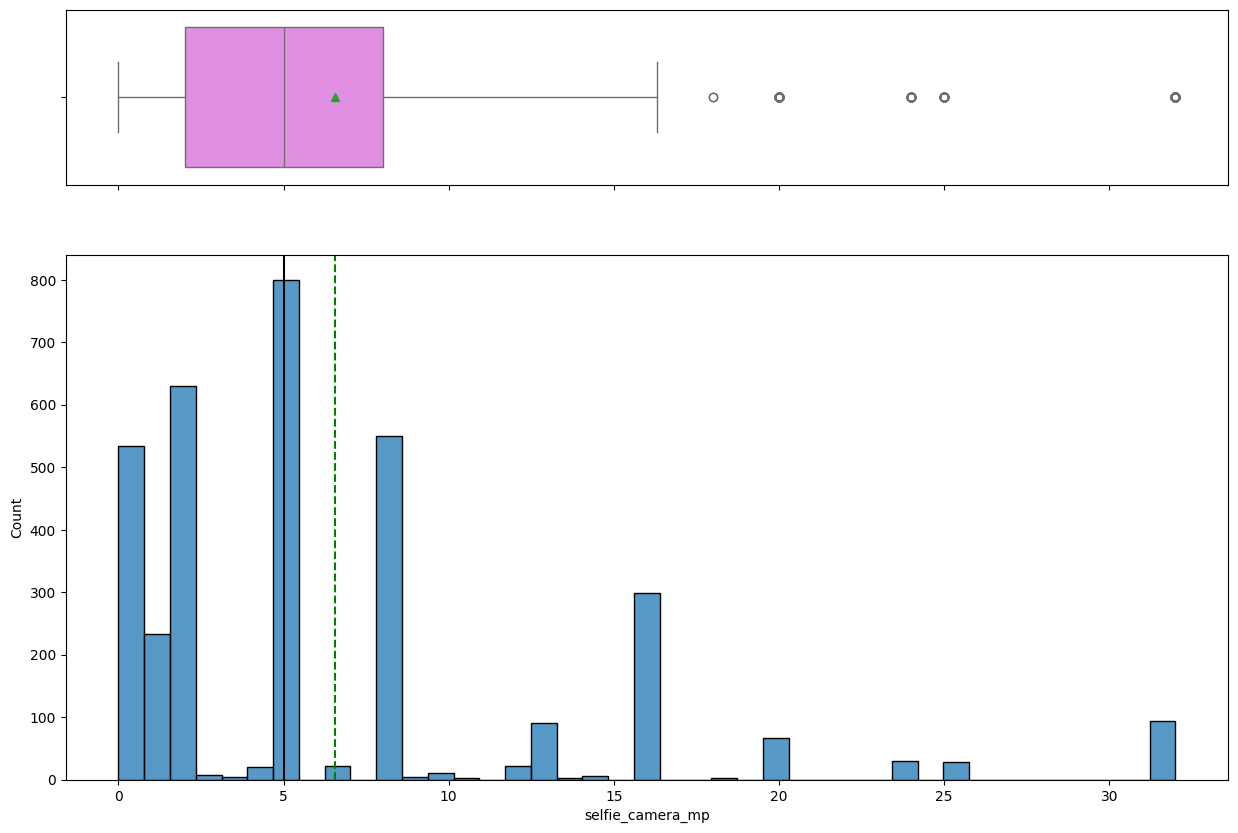

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

* The data is positively skewed, the distribution has a long tail to the right.
* The majority of used devices have selfie cameras with lower megapixels equal to or under 8MP.
* On average used devices have a selfie cameria of 5MP (median value).
* The central 50% of the data (the Interquartile Range) is packed between approximately 2 MP and 8 MP. This is the core range for the used device market.
* The data has distinct groups or peaks which are visible around 2MP, 5 MP, 8MP and 12MP. These peaks represent the standard tiers of camera resolutions offered by manufacturers. The market is built around these specific megapixel counts.
* The highest peak (the mode) is at 5 MP. This is the most common selfie camera resolution.


**`Observations on int_memory`**

**What does the distribution of int_memory look like? Are there distinct tiers or groups?**

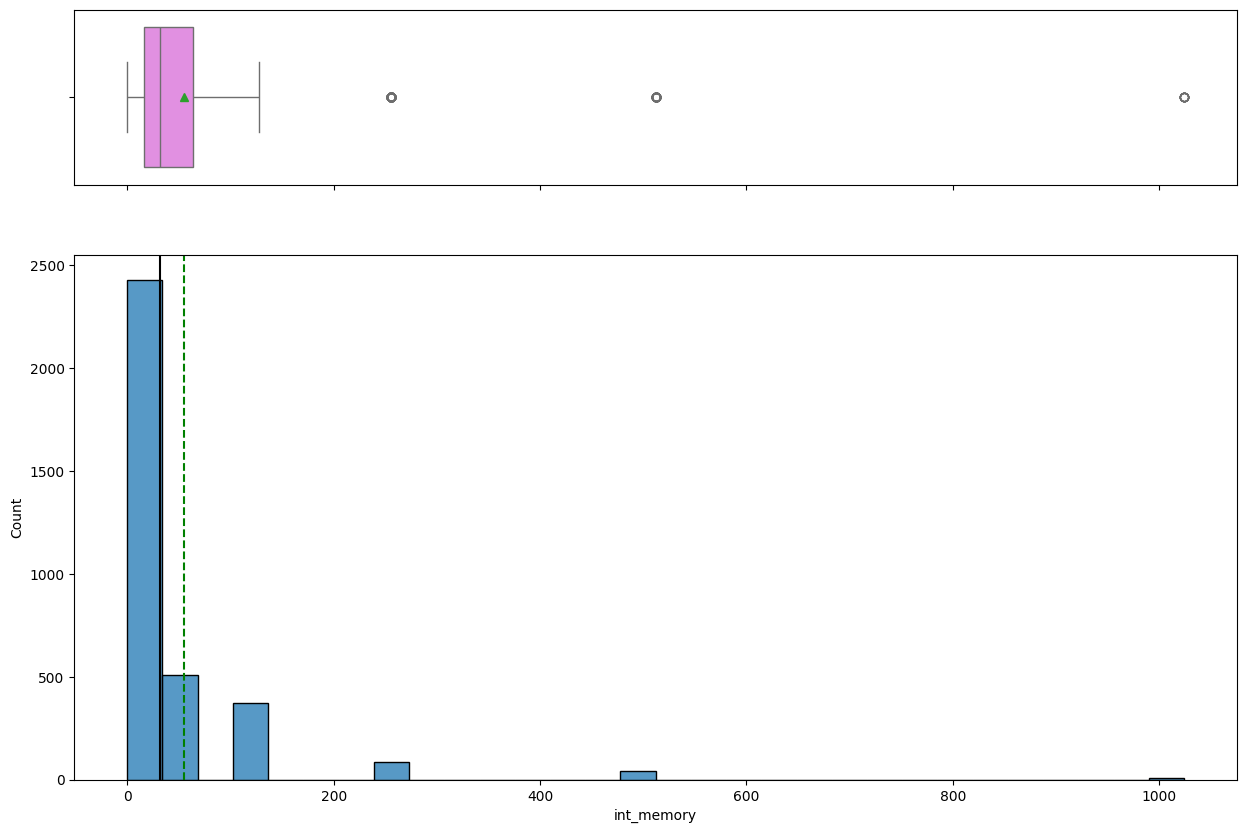

In [20]:
histogram_boxplot(df, "int_memory", bins=30)

* The distribution for internal memory is heavily right-skewed, and most of the used devices have 32Gb or less memory.
* On average a used device has a memory of 32Gb.
* The tallest bars 16Gb, 32Gb and 64Gb count for majority of used device market. The bulk of used devices have lower memory, while high-capacity options represent a smaller, premium segment of the market.

**`Observations on ram`**

**What does the distribution of ram look like? Are there distinct tiers or groups?**

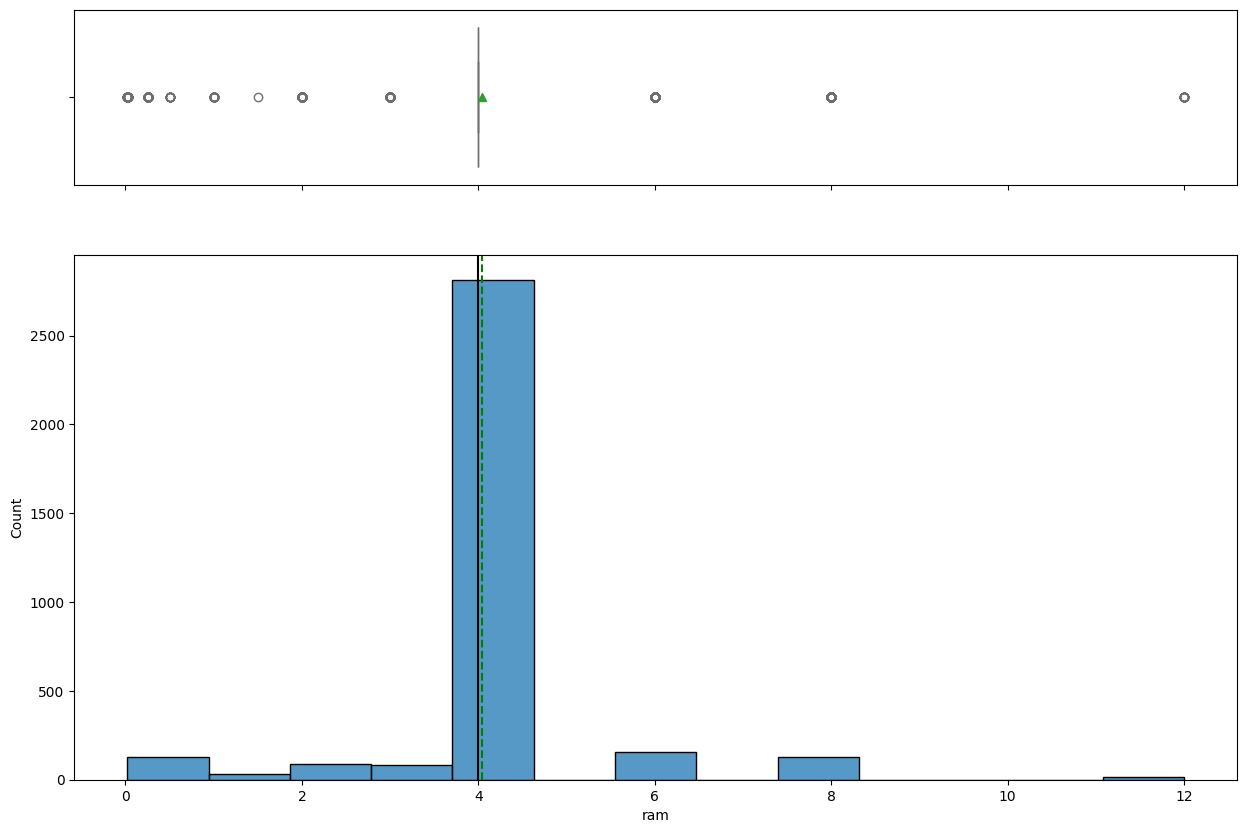

In [21]:
histogram_boxplot(df, "ram")

* The data is normally distributed as mean and median values are approximately the same. This is a strong indicator of symmetry.
* The 25th, 50th (median), and 75th percentiles are exactly 4GB. This suggests that the market is predominantly made out of used devices with 4GB of ram.
* The outliers are not errors but other smaller segments of the market like used devices with 2Gb, 6Gb, 8Gb and 12Gb of ram.

**`Observations on weight`**

**What does the distribution of weight look like?**

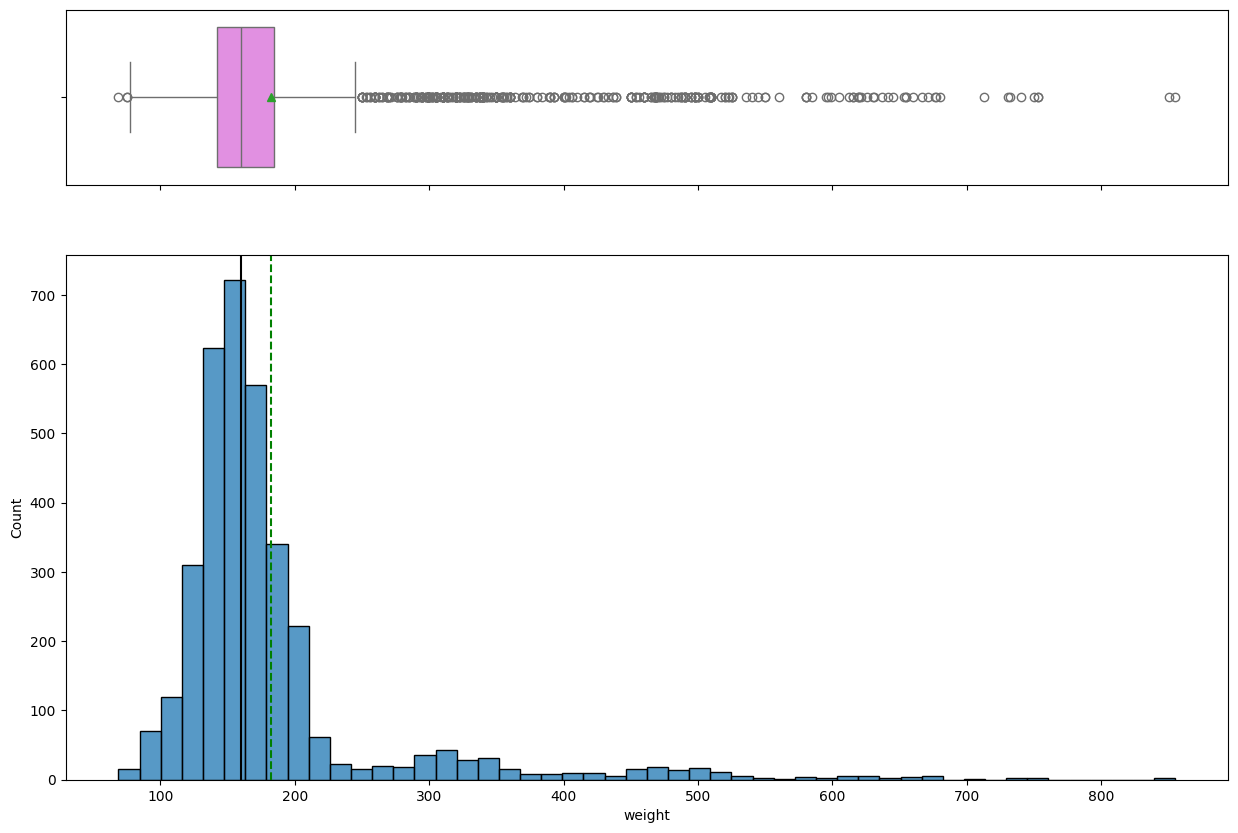

In [22]:
histogram_boxplot(df, "weight", bins=50)

* The distribution for weight is heavily right-skewed, and most of the used devices have a weight of 185 grams or less.
* The average weight of a used device is 160 grams (based on the median value)
* There is a vast number of outliers are less frequent, much heavier weights extending to the right.

**`Observations on battery`**

**What does the distribution of battery look like?**

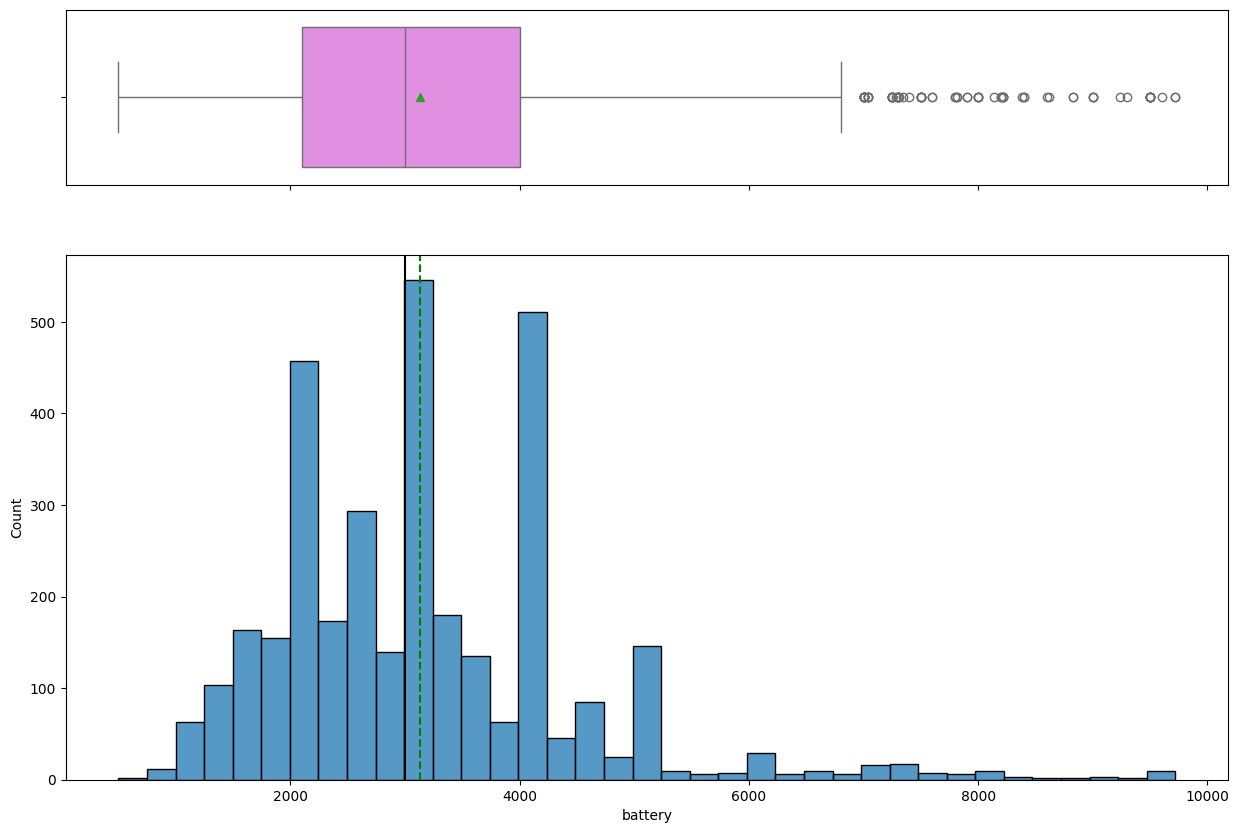

In [23]:
histogram_boxplot(df, "battery")

* The distribution for weight is  right-skewed with a long tail of less frequent, higher-capacity batteries extending to the right.
* On average a used device has a battery capacity of 3000 mAh.
* The boxplot shows that 50% of used devices have battery capacities roughly between 2000 and 4000 mAh.
*  The outliers are not errors but show the high-end market for used devices with very large batteries.


**`Observations on days_used`**

**What does the distribution of days_used look like?**

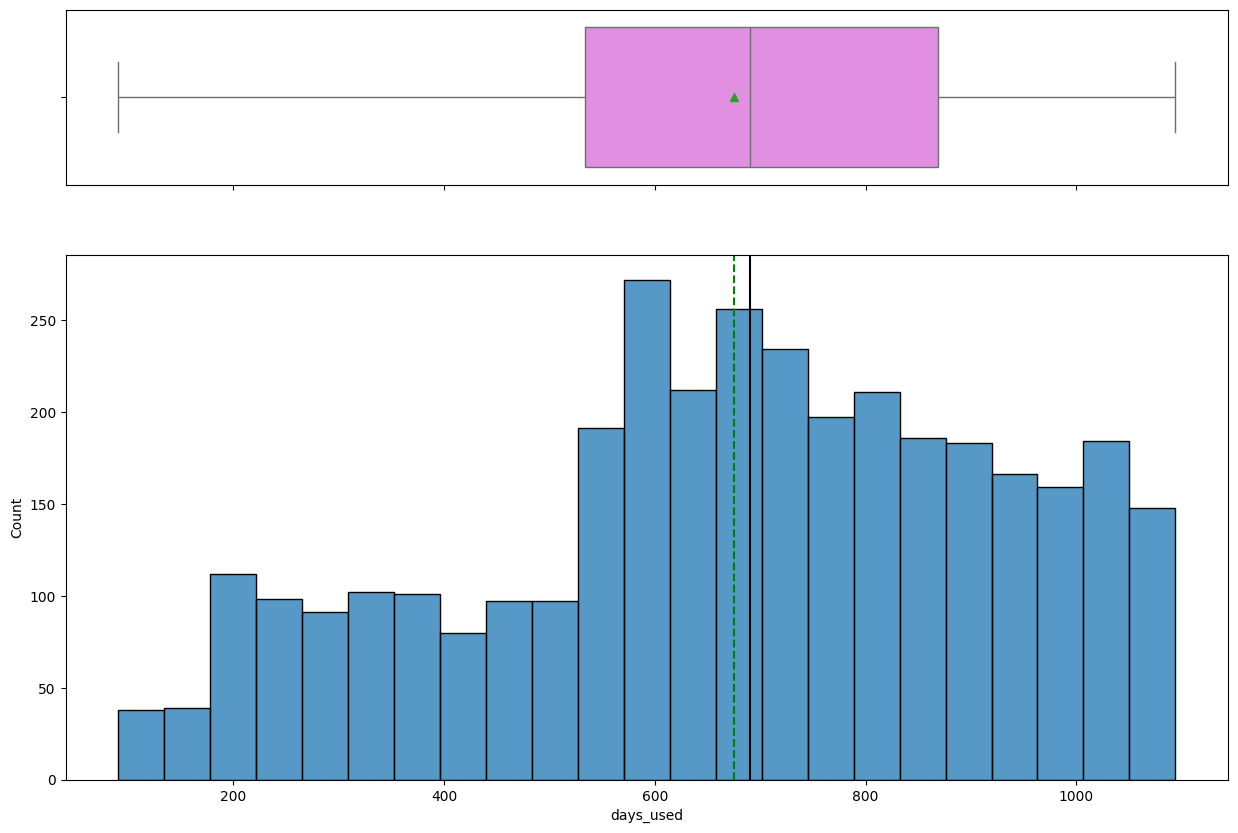

In [24]:
histogram_boxplot(df, "days_used")

* The distribution is slightly left skewed, with majority of used devices being sold previously used for about 670 days.
* 50% of devices previously used lie approximately between 500 to 900 days.

**`Observations on brand_name`**

**Which brand names dominate the used device market**

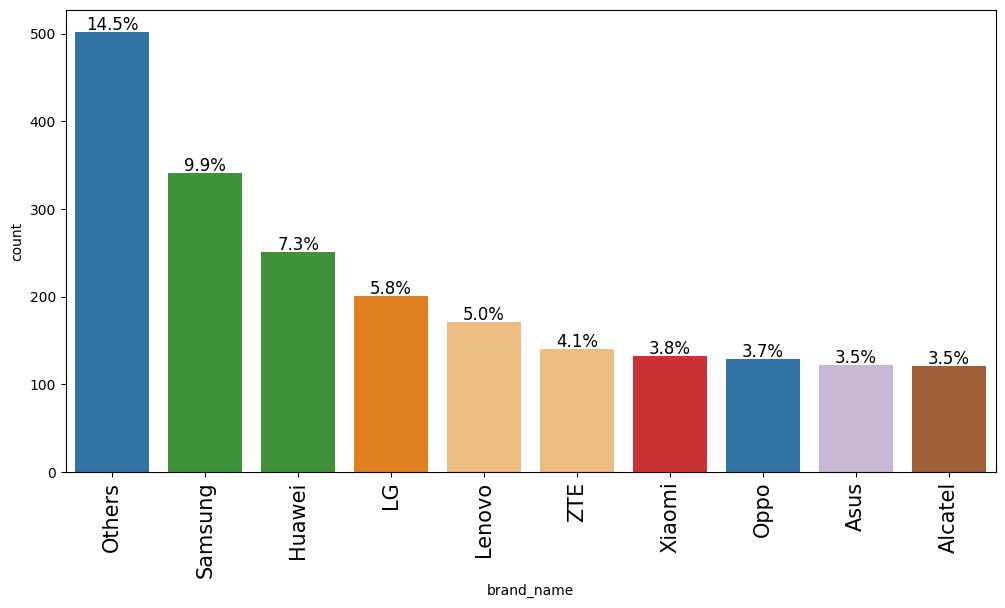

In [25]:
labeled_barplot(df, "brand_name", perc=True, n=10)

* Samsung is the most popular brand name in the used device market taking 9.9% of the market share.
* The top three brands in the used device market are Samsung, Huawei and LG.

**`Observations on os`**

**What percentage of the used device market is dominated by Android devices?**

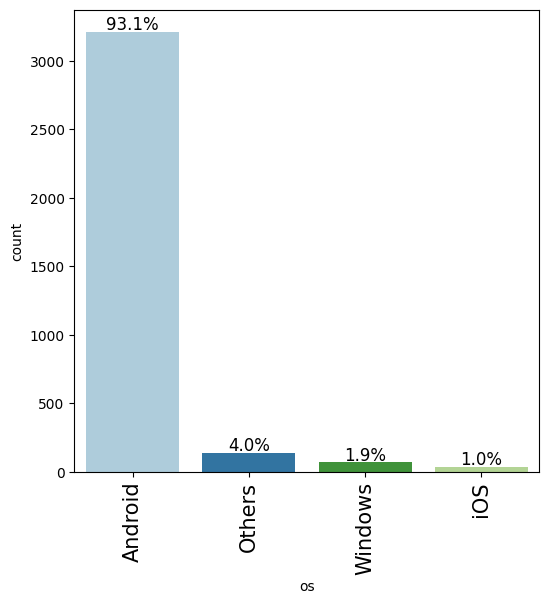

In [26]:
labeled_barplot(df, "os", perc=True)

* Android used devices account for 93% of the used device market.

**`Observations on 4g`**

**What percentage of used devices have 4g?**

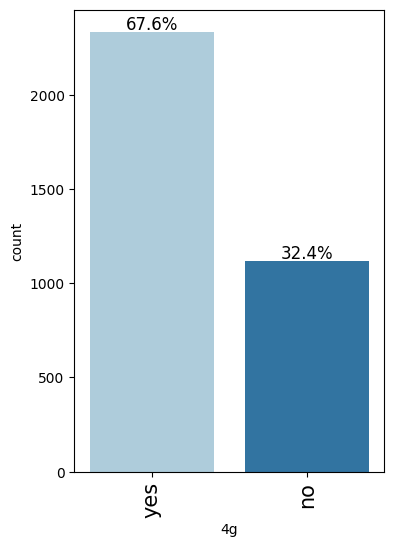

In [27]:
labeled_barplot(df, "4g", perc=True)

* 4g used devices account for 67.6% of the used device market, which is a large proportion of the market.

**`Observations on 5g`**

**What percentage of used devices have 5g?**

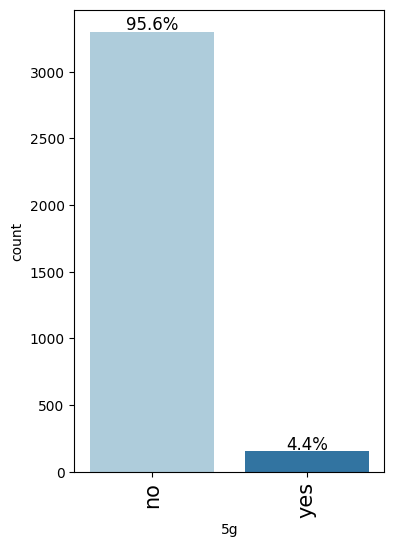

In [28]:
labeled_barplot(df, "5g", perc=True)

* 5g used devices account for only 4.4% of the used device market.

**`Observations on release_year`**

**Which release year has the highest percentage of used devices**

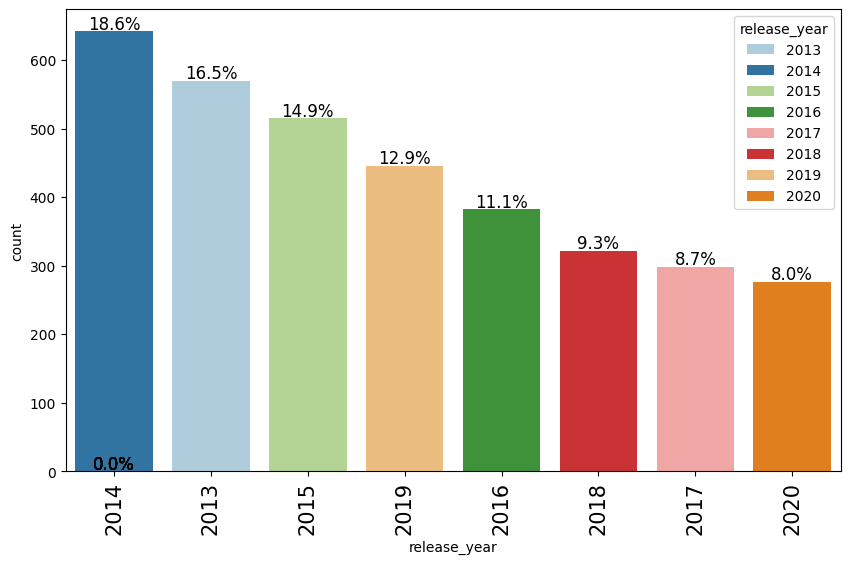

In [29]:
labeled_barplot(df, "release_year", perc=True)

* Devices that were released in the year 2014 account for the highest percentage (18.6%) of the used devices.
* Devices that were released in years 2013, 2014 and 2015 make up 50% of the used device market.

### Bivariate Analysis

**Which attributes are highly correlated with the normalized price of a used device?**

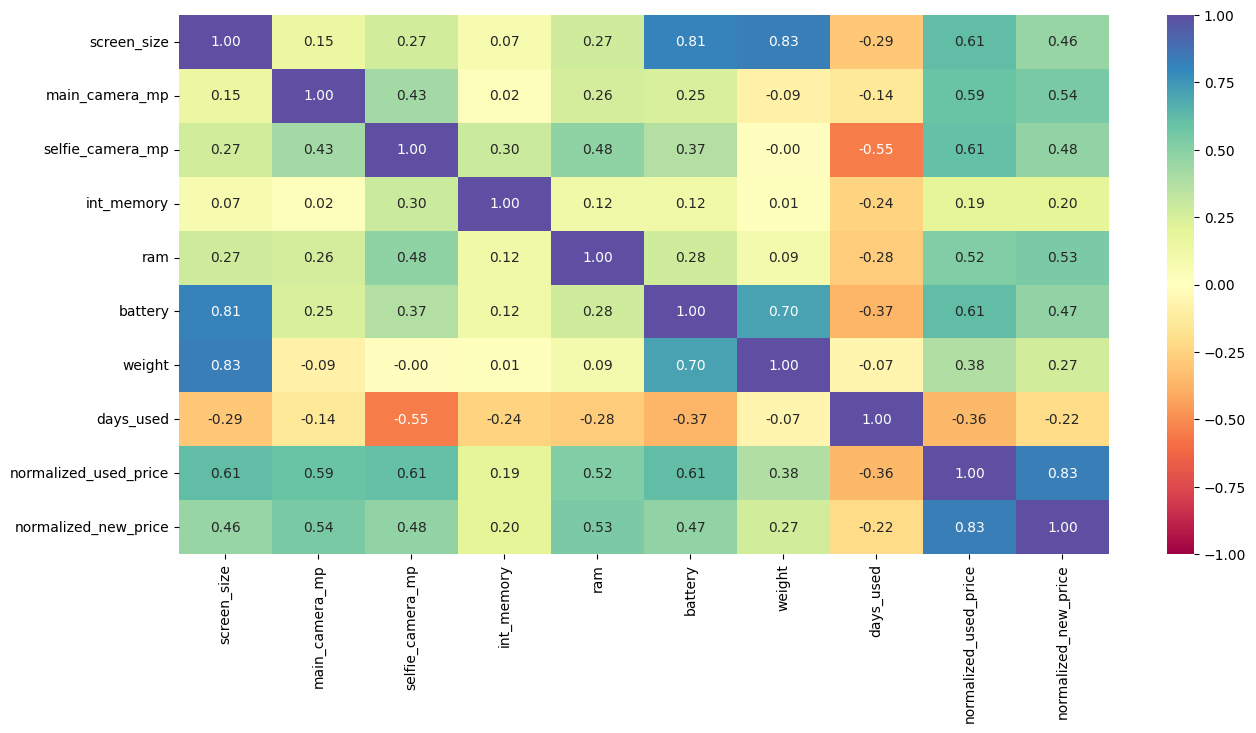

In [30]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The normalized used price is very highly correlated with normalized new price
* The normalized used price is highly correlated with variables - screen_size, selfie_camera_mp, battery, main_camera_mp, and ram.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

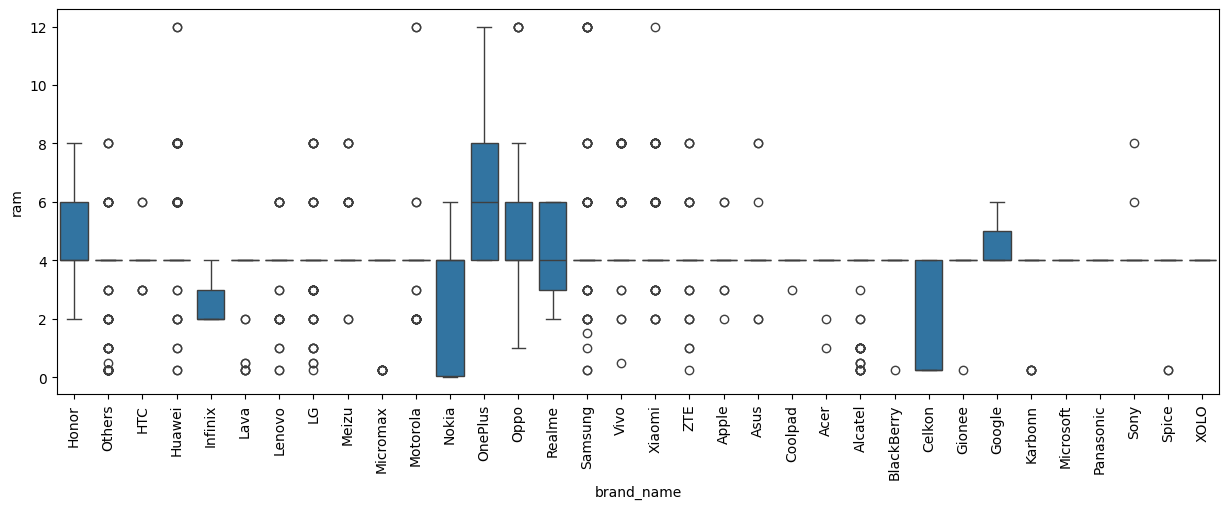

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* Oneplus has the highest median RAM at 8 GB. This brand targets the  premium or power-user market.
* Oppo has a higher median RAM at 6 GB. suggesting their devices are positioned for the high performance market targeting power users, content creators and gamers.
* Most of the brands including Samsung, Vivo and Xiaomi have a median RAM value that sits exactly on the 4GB baseline. This indicates that 4GB is the most common RAM for the bulk of their devices, representing the core mid-range market.
* Brands like Infinix, Celkon, Blackberry, Alcatel, Gionee, Karbonn, Spice have a median RAM value that sits below the 4GB baseline. These devices may be positioned for the budget, entry-level markets.


**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [32]:
#Create new dataframe for devices with batteries more than 4500 mAh
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

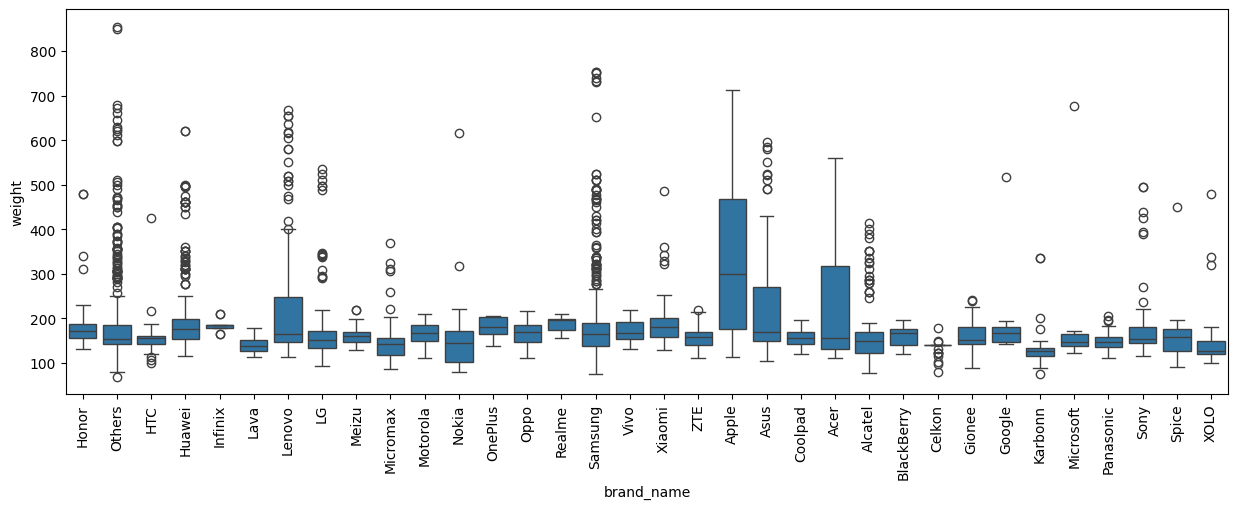

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

* Majority of devices offering large batteries have a median weight between 160g - 200g. Many modern smart phones fall within this range.
* Apple devices with larger batteries have a median value of around 300g which is the highest among all the brands, it also has the highest spread. This suggests larger battery models for this brand are premium models like iphone pro max and ipads.
* Apple, Acer, Lenovo and Asus have taller Interquartile Range boxes. These brands offers a wide variety of devices with very different weights. The middle 50% of their products span a broad weight range.

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [34]:
#Create new dataframe for devices with a screen size larger than 6 inches
# Multiply by 2.54 to convert to cm
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

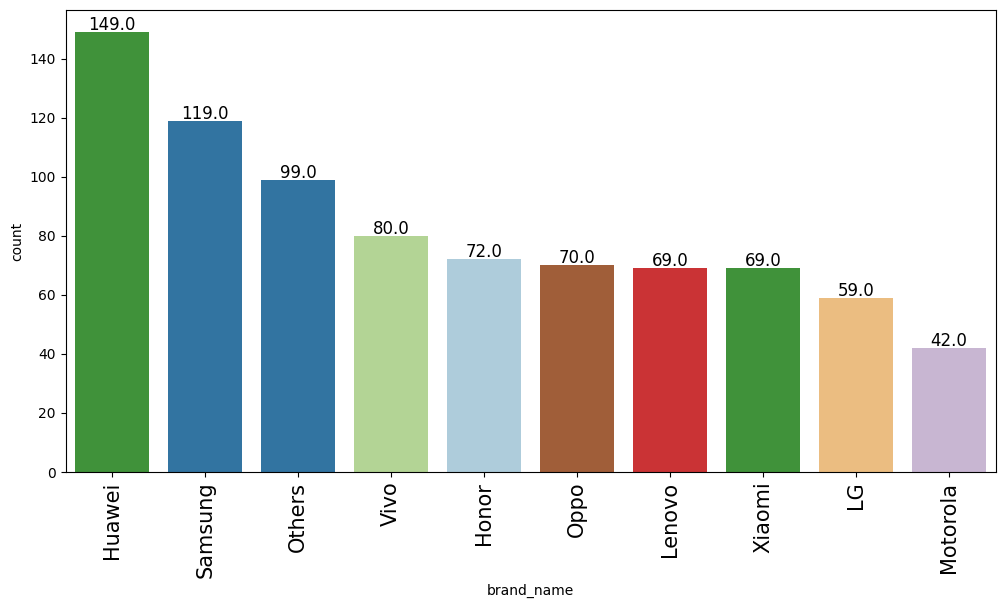

In [35]:
labeled_barplot(df_large_screen, "brand_name", n=10)

* There are 1099 devices available across different brands with a screen size larger than 6 inches.
* Huawei is the brand with the largest amount of devices with a screen size larger than 6 inches (149).

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [36]:
#Create new dataframe for devices offering greater than 8MP selfie cameras
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

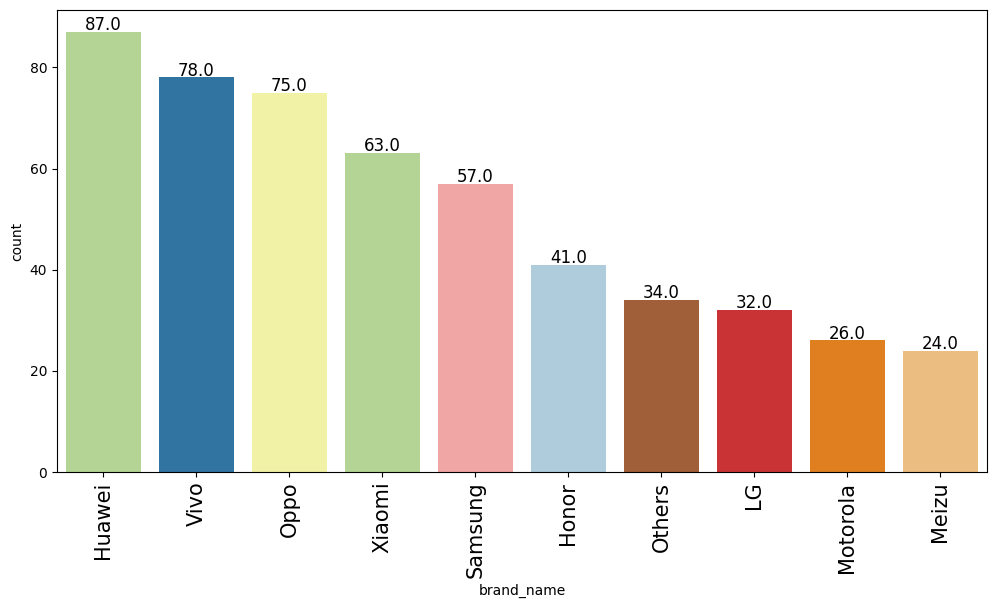

In [37]:
labeled_barplot(df_selfie_camera, "brand_name", n=10)

* There is a total of 655 devices with selfie cameras greater than 8MP.
* Huawei, Vivo and Oppo are the top 3 brands offering devices with selfie cameras greater than 8MP.

**Rear cameras generally have a better resolution than front (selfie) cameras. What is the distribution of devices offering greater than 16MP rear cameras across brands**

In [38]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

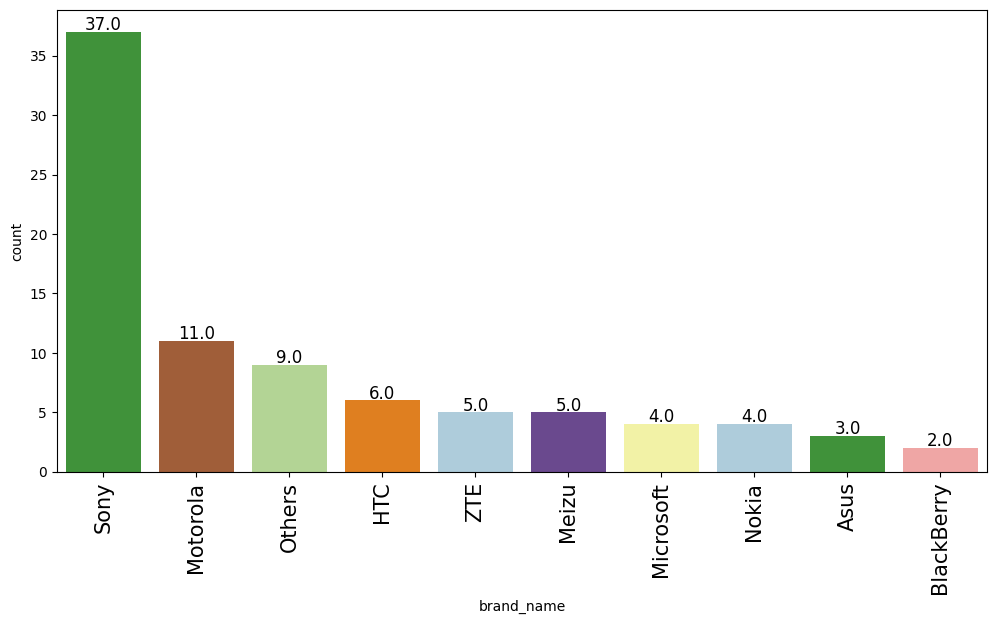

In [39]:
labeled_barplot(df_main_camera, "brand_name", n=10)

* In total there are 94 devices that have rear cameras over 16 MP.
* Sony has the largest share of this segment with 37 devices that have rear cameras over 16 MP.

**How does the price of used devices vary over the years.**

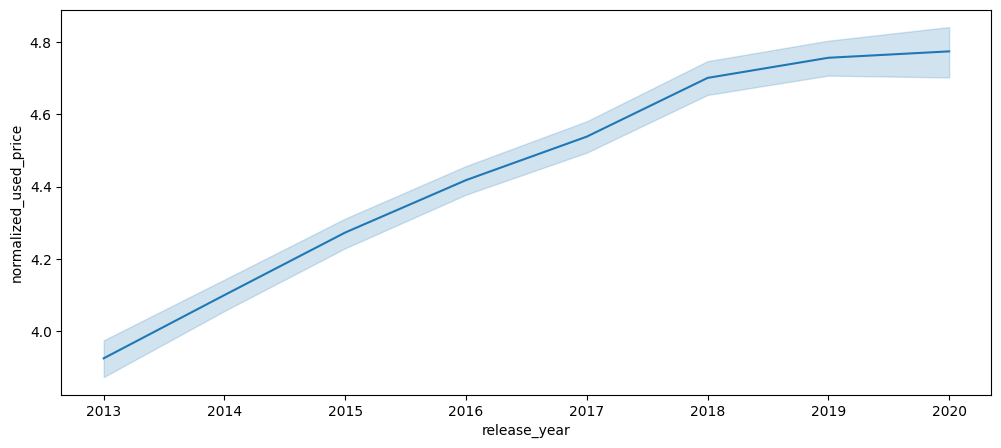

In [40]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price")
plt.show()

* From 2013 to 2018, the graph shows a steady linear increase.
* From 2018 onwards, the line is still increasing but starts to flatten showing the rate of increase has slowed down considerably. This suggests that the price difference in more recent models is considerably less than the price difference seen in older models.

**How does used price and new price vary for used phones and tablets offering 4G and 5G networks.**

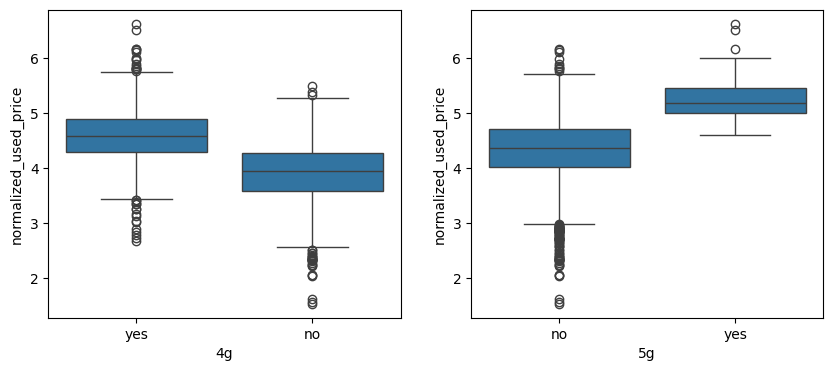

In [41]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* Used devices with 5g have a higher used price than used devices with 4g

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [42]:
# Check for missing values
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight attributes have missing values
* We can use the median values of these attributes to replace the missing values.
* Instead of using the median value calculated for the entire attribute, we will use the release_year median value for that attribute, as this gives a more accurate reading.

In [43]:
# Create a copy of the data
df1 = df.copy()

In [44]:
# Replace missing values with median values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year'])[col].transform("median"))

In [45]:
# Check for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* All the missing values have been treated.

In [46]:
# Feature Engineering
# create a new column years_since_release
# 2021 the most recent year in the data will be the baseline.
# We will drop the release_year column.

df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

In [47]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


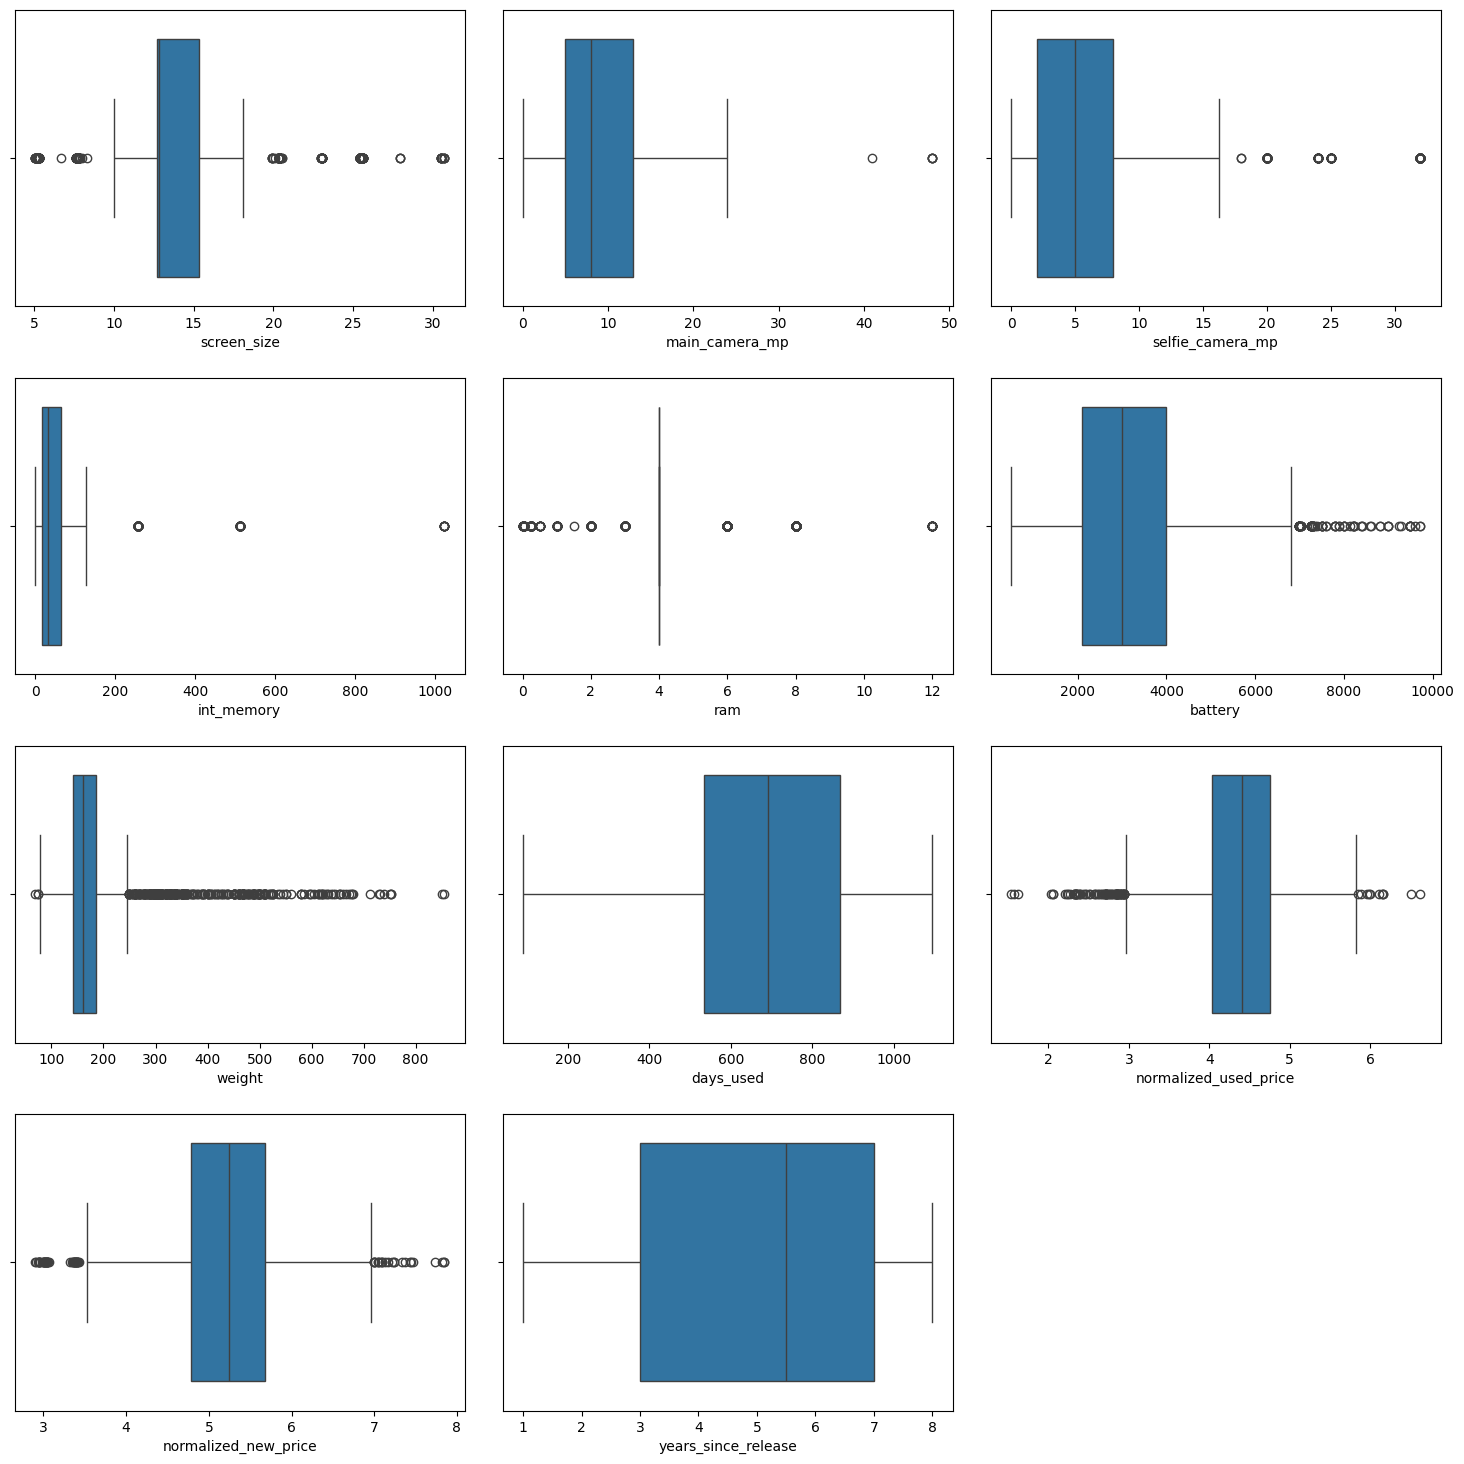

In [48]:
# Checking for Outliers using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* The data contains outliers, but they are not errors but instead important smaller groups of the attribute.
*  We will not treat them as they are proper values

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [49]:
df1.shape

(3454, 15)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

In [51]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.456624,4.712036,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.560854,84.926848,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.037238,1.365132,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.186595,1298.991203,500.0,2100.0,3000.0,4000.0,9720.0


- Everything seems ok with the data, the median values remain the same across the variables.

## Data Preparation for modeling

In [52]:
# independent variables
X = df1.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

In [54]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [55]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [58]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                           15:56:18   Log-Likelihood:                 121.53
No. Observations:                   2417   AIC:                            -145.1
Df Residuals:                       2368   BIC:                             138.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* The R-squared value os 0.845. It means that 84.5% of the variation in the used price of devices can be explained by the features in the model. This is a good model.
* The R-squared and Adjusted R-squared values are approximately the same, it's a good sign that the model isn't filled with irrelevant features.
* The const coefficient is 1.329. This the predicted value of normalized_used_price when all other features in the model are zero.
* The p-value for the const coefficient is 0.000. The p-value is under 0.05, which means the intercept is statistically significant.

## Model Performance Check

In [59]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [60]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230105,0.180571,0.844587,0.84137,4.332694


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239083,0.185073,0.841519,0.833651,4.511746


- The training R-squared is 0.84, so the model is not underfitting.

- The train and test RMSE and R-Squared and MAE are comparable, which shows the model is not overfitting.

- MAE suggests that the model can predict used device prices within a mean error of 0.19 on the test data.

- MAPE of 4.51 on the test data means that we are able to predict within 4.51% of the used device prices. It means that, on average, the model's price prediction is off by about 4.5% which can be considered a low error rate.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### TEST FOR MULTICOLLINEARITY


In [62]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [63]:
checking_vif(x_train)

,feature,VIF
0,const,228.926905
1,screen_size,7.681828
2,main_camera_mp,2.201190
3,selfie_camera_mp,2.811591
4,int_memory,1.361251
5,ram,2.239531
6,battery,4.042104
7,weight,6.372828
8,days_used,2.668030
9,normalized_new_price,3.144145


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared (compared to the original model).
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [64]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [65]:
col_list = ["brand_name_Apple", "os_iOS"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841503,0.232425
1,os_iOS,0.841493,0.232433


* The Adjusted R-squared values are comparable for both columns, we will drop brand_name_Apple as there is a little more change in adjusted R-squared value when compared to the original model.

In [66]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,228.462657
1,screen_size,7.648123
2,main_camera_mp,2.200257
3,selfie_camera_mp,2.790344
4,int_memory,1.361239
5,ram,2.231603
6,battery,4.040095
7,weight,6.370262
8,days_used,2.667499
9,normalized_new_price,3.127637


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [67]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     273.9
Date:                   Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                           15:56:21   Log-Likelihood:                 121.52
No. Observations:                   2417   AIC:                            -147.0
Df Residuals:                       2369   BIC:                             130.9
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has gone from 0.841 to 0.842, which shows that the dropped column did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Build a model, check the p-values of the variables, and drop the column with the highest p-value
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
- Repeat the above two steps till there are no columns with p-value > 0.05
- This is done using a loop statement

In [68]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [69]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [70]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1068.
Date:                   Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                           15:56:24   Log-Likelihood:                 101.62
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2404   BIC:                            -102.0
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [71]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232008,0.182006,0.842006,0.841152,4.365897


In [72]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237159,0.183662,0.84406,0.842078,4.47268


**Observations**

* With this new model, no variable has p-value greater than 0.05, so we'll consider the variables in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with.
* A lot of features were removed however the adjusted R-squared remained the same 0.841, which shows that our original model contained a lot of unnecessary variables that did not add to the performance of the model.
* The new model is able to explain ~84% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [73]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855596,0.231892
1525,4.448399,4.629918,-0.181518
1128,4.315353,4.280508,0.034845
3003,4.282068,4.238366,0.043703
2907,4.456438,4.469967,-0.013529


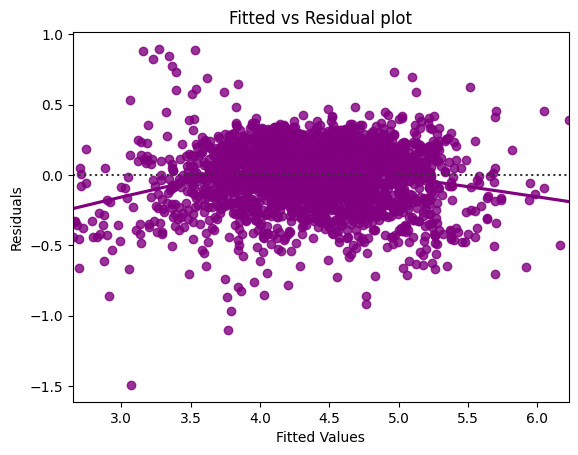

In [74]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

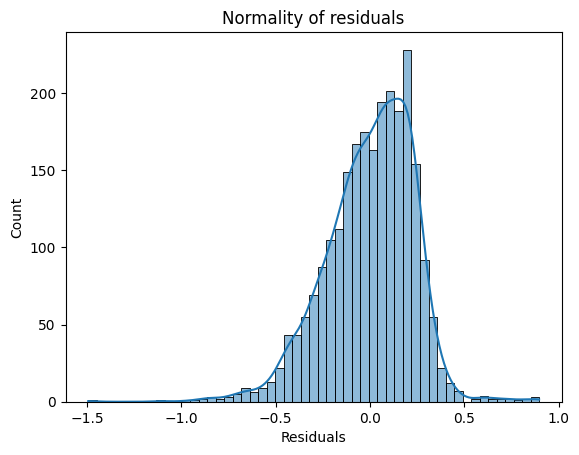

In [75]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.


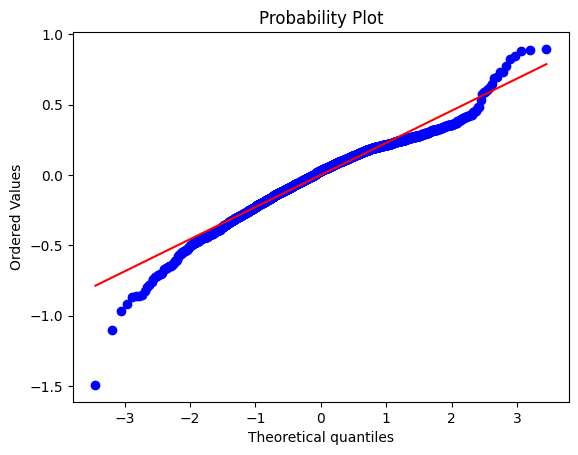

In [76]:
# Let's check the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [77]:
# Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9705198878768159), pvalue=np.float64(6.882050017046336e-22))

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY


- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [78]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.0393293043983938)),
 ('p-value', np.float64(0.25246757217035765))]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [79]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373107
2341,3.696103,3.964844
1913,3.592093,3.706762
688,4.306495,4.104938
650,4.522115,5.130390
2291,4.259294,4.387984
40,4.997685,5.456927
1884,3.875359,4.067003
2538,4.206631,4.043865
45,5.380450,5.290735


- The model has returned pretty good prediction results, and the actual and predicted values are comparable.

## Final Model

In [80]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [81]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1068.
Date:                   Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                           15:56:25   Log-Likelihood:                 101.62
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2404   BIC:                            -102.0
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [82]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232008,0.182006,0.842006,0.841152,4.365897


In [83]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237159,0.183662,0.84406,0.842078,4.47268


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* MAPE of 4.47 on the test data means on average, the model's price prediction is off by about 4.47% which can be considered a low error rate.

* Hence, we can conclude the model *olsmodel_final* is good for predicting used device prices as well as inference purposes

## Insights

1. The model is able to explain ~84% of the variation in the data and an error rate of 4.47% on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes

2. New price is the top predictor of a device used price. If the new price of a device increases by one unit, then its used price increases by 0.4197 units, all other variables held constant.

3. Device hardware components such as RAM, main_camera_mp, screen_size, and selfie_camera_mp all have positive and statistically significant coefficients. A unit increase in these features causes an increase in the resale value of a device.

4.  If years_since_release of a device increases by one unit, then its used price decreases by 0.0209 units, all other variables held constant. For each year older a device is, its used price drops, holding all else constant.

5. Features such as - brand_name_Lenovo, brand_name_Nokia and brand_name_Xiaomi have an positive impact on used price. A unit increase in these features causes an increase in the resale value of a device.

6. If 4g_yes increases by one unit, then its used price increases by 0.0434 units


## Recommendations

1. Use the model to create an effective pricing strategy app. By inputing a device specifications, the app generates a competitive used device price, while reducing manual labour, error and inconsistencies.

2. Focus on harware components when buying used device inventory. Focus on more premium models with higher RAM, bigger screens and better cameras as these features directly increase the resale price of a device.

3. The Lenovo, Nokia and Xiaomi brands are shown by the regression model to have a positive effect on resale value. Focus on acquiring these brand devices as they tend to retain their resale value better.

4. Fous on acquiring newer used devices. The newer a device is, the better its resale value.

5. ReCell can improve its marketing efforts by promoting in their marketing materials premium models from these brands - Lenovo, Nokia and Xiaomi as well as the device features such RAM, camera megapixels, and screen size.

6. Clearly label instore and online (website, adverts) - 4g Enabled. This feature positively influences used price.

7. Clearly label instore and online (website, adverts) on each used device its features especially RAM, camera megapixels, and screen size.

8. ReCell can gather more data about its used devices including type of device (smart phone, tablet, laptop) and device model make. This will help better understand the demand for used devices.

___